In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales-sheet-csv/supermarket_sales - Sheet1.csv


# Task 1: Initial Data Exploration
# Load the dataset into a pandas DataFrame and inspect its structure

In [26]:
# Load the dataset
df = pd.read_csv('/kaggle/input/supermarket-sales-sheet-csv/supermarket_sales - Sheet1.csv')

# Inspect the dataset
# Display basic information about the dataset, such as the data types of each column, and if there are any null values
print("Initial Data Exploration:")
print(df.info())

# Display the first few rows of the dataset to get a quick look at the data
print(df.head())

Initial Data Exploration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14 

# Task 2: Univariate Analysis
# Perform analysis on single variables to understand their distributions, identify outliers, and summarize data



Summary Statistics:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.76

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


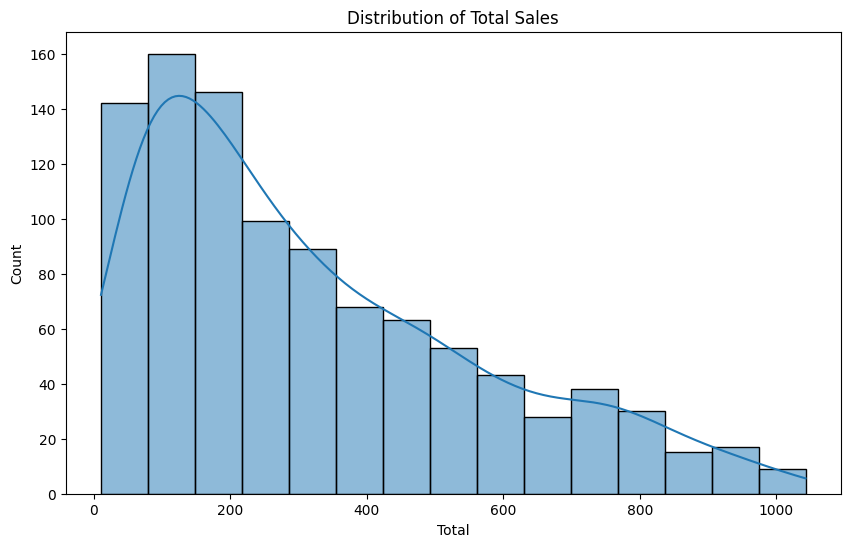

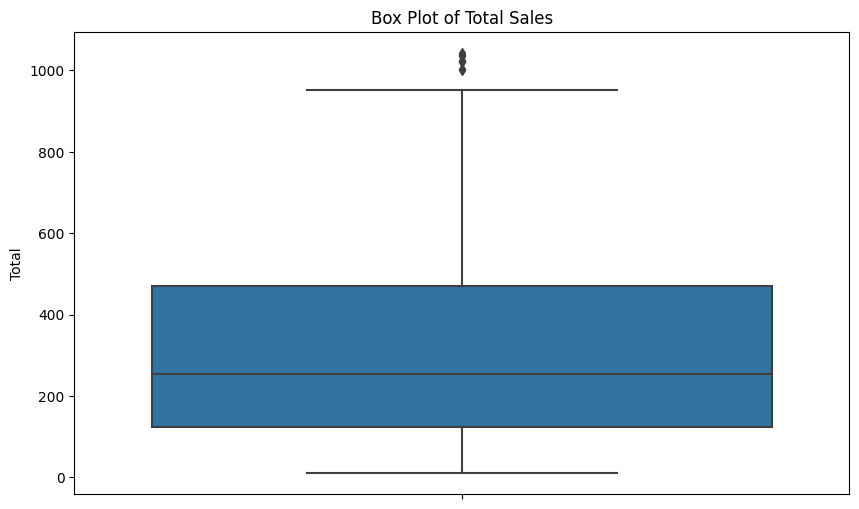

In [27]:
# Summary statistics
# Generate descriptive statistics including count, mean, std, min, 25%, 50%, 75%, and max for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Visualize data distribution
# Create a histogram with a KDE (Kernel Density Estimate) plot for the 'Total' column to see the distribution of total sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], kde=True)
plt.title('Distribution of Total Sales')
plt.show()

# Identify outliers using box plot
# Create a box plot for the 'Total' column to visually identify any outliers in the total sales data
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Total'])
plt.title('Box Plot of Total Sales')
plt.show()


# Task 3: Bivariate Analysis
# Analyze relationships between two variables to understand interactions between them


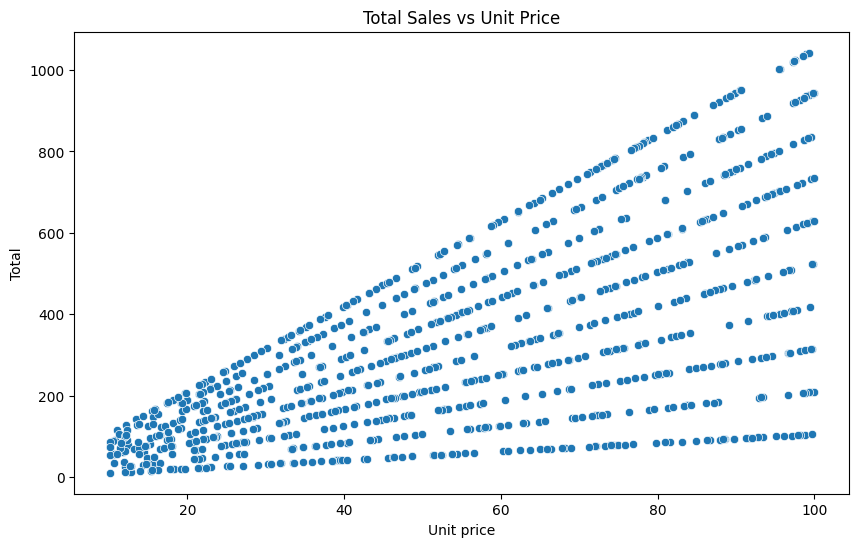

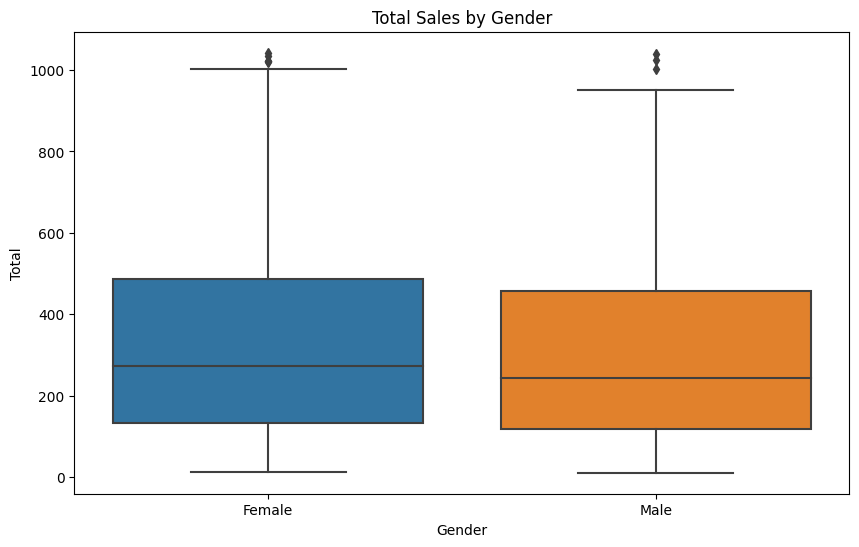

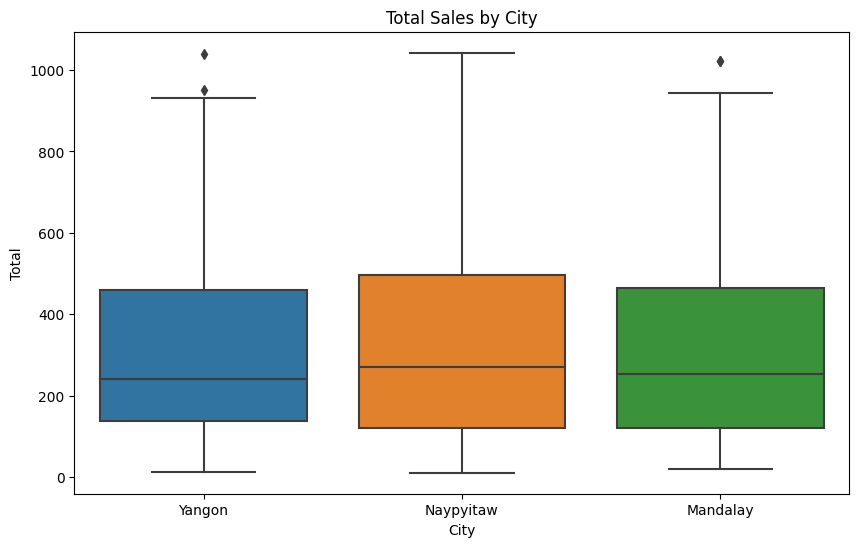

In [28]:
# Visualize relationships between variables
# Create a scatter plot to visualize the relationship between 'Unit price' and 'Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit price', y='Total', data=df)
plt.title('Total Sales vs Unit Price')
plt.show()

# Analyze interactions between categorical and numerical data
# Create box plots to analyze the relationship between 'Gender' and 'Total' sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Total', data=df)
plt.title('Total Sales by Gender')
plt.show()

# Create box plots to analyze the relationship between 'City' and 'Total' sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Total', data=df)
plt.title('Total Sales by City')
plt.show()


 Task 4: Handle Duplicates and Missing Values
# Ensure data quality by addressing duplicates and missing values


In [29]:
# Check for duplicates
# Count the number of duplicate rows in the dataset
print("\nChecking for Duplicates:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
# Drop any duplicate rows from the dataset
df = df.drop_duplicates()

# Check for missing values
# Count the number of missing values in each column
print("\nChecking for Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)


Checking for Duplicates:
Number of duplicate rows: 0

Checking for Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


# Task 5: Correlation Analysis
# Analyze the correlations between numerical variables to understand their relationships


In [30]:
# Calculate correlation matrix
# Compute the correlation matrix to see the pairwise correlation of all numerical columns
corr = df.corr()

# Visualize correlations
# Create a heatmap to visualize the correlation matrix, highlighting strong correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pair plot for various numerical columns
# Generate a pair plot to visualize relationships between multiple numerical columns
sns.pairplot(df[['Total', 'Quantity', 'Unit price', 'gross income']])
plt.show()

ValueError: could not convert string to float: '750-67-8428'